**0. Introduction**

**1. Foundational Concepts in Audio Processing**
- Waveforms
- The Sine
- Key Concepts in Sampling
    - Sampling Continous Functions
    - Sample Rate (SR)
    - Nyqvist Theorem
    - Quantization
        
- Cultural Pitch Perspectives
- Intensity, Loudness & Timbre
- Sound Envelopes
- Complex Sounds
    - Linear Superposition
    - Amplitude & Frequency Modulation
- Complex Numbers
    - Fourier Transform
    - Short-Time Fourier Transform

**2. Audio Features**
- Level of Abstraction
- Temporal Scope
- Signal Domain
- Spectrogram
- Mel Spectrogram
    - Filter banks

- Frequency Domain
    - Band Energy Ratio
    - Spectral Centroid
    - Bandwidth

- Basic Feature Extraction
    - Metadata
    - Amplitude Envelope (AE)
    - Root-mean-square Energy (RMS)
    - Zero-crossing Rate (ZR)

**3. Feature Extraction**
- Spectral Leakage, Frames & Windowing

- Extracting basic features



**4. Machine Learning**
- Music genre classification (focus on features capturing rhythmic and harmonic content)
- Speech emotion recognition (features related to pitch and spectral variations)
- Audio event detection (e.g., identifying gunshots, footsteps)

    

Ideas

**5. Deep Learning**
- Music Augmentation
- Recurrent Neural Networks (RNNs) - for tasks involving sequential data like music
- Convolutional Neural Networks (CNNs) - for learning patterns from spectrograms
- Autoencoders - for dimensionality reduction and feature learning
- Generative Adversarial Networks (GANs) for generating music in different styles
- Music Transformer models for composing musical pieces based on prompts


**6. Open-source Tools and Datasets**
- OpenSMILE
- Essentia
- The McGill Billboard Dataset (for music genre classification)
- The RWC Music Database (for various music analysis tasks)

Applications of Audio Processing
- Speech processing (used for voice recognition, noise cancellation)
- Audio effects (used for creating reverb, chorus, etc.)
- Audio compression (used for reducing file size for streaming)
- Medical applications (e.g., analyzing heart sounds)

Audio Coding
- Pulse Code Modulation (PCM)
- Quantization
- Lossy vs. Lossless compression formats (MP3, AAC, FLAC)

Audio Analysis (Part of feature?)
- Music Information Retrieval (MIR) - tasks like genre classification, mood detection, instrument recognition
- Audio segmentation - dividing audio into meaningful segments (e.g., silence, speech, music)
- Music transcription - automatically converting music to sheet music


Signal Processing Techniques
- Filtering: Explore different filter types (e.g., low-pass, high-pass, bandpass) and their applications in audio processing.
- Convolution: Explain how convolution is used for audio effects like reverb and echo.
- Adaptive filtering: Discuss how this technique can be used for noise cancellation.

Audio Restoration and Enhancement
- Noise reduction techniques for removing background noise and hum
- Click and pop removal
- Speech enhancement for improving clarity

More:

- YIN algorithm

# Introduction

# Foundational Concepts in Audio Processing
This section focuses on the Foundational Concepts in Audio Processing. Here, we'll explore the essential principles that form the backbone of audio analysis. We'll examine core elements such as waveforms, timbre, pitch, and amplitude, providing a solid framework for understanding subsequent discussions on feature extraction techniques.

## Waveforms

A waveform is a visual representation of a signal's variation over time. It's a fundamental concept in understanding and analyzing sound, electrical signals, and other forms of wave propagation.
Waveforms carries multifactorial information:

- **Frequency**: The *rate of oscillation* of the waveform, which determines the *pitch* of a sound. Higher frequencies correspond to higher pitches, while lower frequencies correspond to lower pitches. 

- **Amplitude**: Also known as intensity, amplitude represents the *strength* or *loudness* of the waveform. Higher amplitudes correspond to louder sounds, while lower amplitudes correspond to softer sounds.

- **Timbre**: Timbre refers to the *quality* or *tone color* of a sound. It distinguishes between different instruments or voices even when they are playing the same note at the same volume. Timbre is influenced by various factors, including the harmonic content, envelope, and other spectral characteristics of the waveform.

- **Periodic Waveforms**:
   - These waveforms repeat themselves over time.
   - They have a fundamental period, which is the smallest interval of time after which the waveform repeats.
   - Examples include sine waves, square waves, and triangular waves.
   - Mathematically, a periodic waveform $ f(t) $ satisfies $ f(t) = f(t + T) $ for all $ t $, where $ T $ is the period.

- **Aperiodic Waveforms**:
   - These waveforms do not repeat themselves over time.
   - They may have transient components or random variations that prevent exact repetition.
   - Examples include impulses, noise signals, and most real-world audio signals.
   - Mathematically, an aperiodic waveform does not satisfy $ f(t) = f(t + T) $ for any value of $ T $ other than $ T = 0 $.



## The Sine

### $f(t) = A \cdot \sin(2\pi f t + \phi)$

The sine wave equation represents a signal with various parameters:

- $ A $: Amplitude, determining the height of the wave. Measured in units such as volts or decibels.
- $ f $: Frequency, indicating the rate of oscillation. Typically measured in Hertz (Hz)
- $ \phi $: Phase, allowing the waveform to be shifted left or right.
- $ t $: Time variable, denoting the moment at which the waveform is observed.


**Frequency and Period:**
Frequency $( f $) measures how often the waveform repeats within a given time frame. It is inversely proportional to the period $( T $), the duration of one complete cycle, expressed as $ f = \frac{1}{T} $.

**Amplitude:**
Amplitude $( A $) represents the magnitude of the wave's displacement from its resting position. It corresponds to the "height" or "depth" of the perturbation in air pressure, determining the wave's intensity.

**Phase:**
The phase angle $( \phi $) determines the horizontal shift of the waveform along the time axis. By adjusting $ \phi $, we can effectively move the waveform to the "right" or "left" within the time domain.

Understanding these parameters provides insight into the behavior and characteristics of sine waves, which are fundamental in various fields, including signal processing, physics, and engineering.

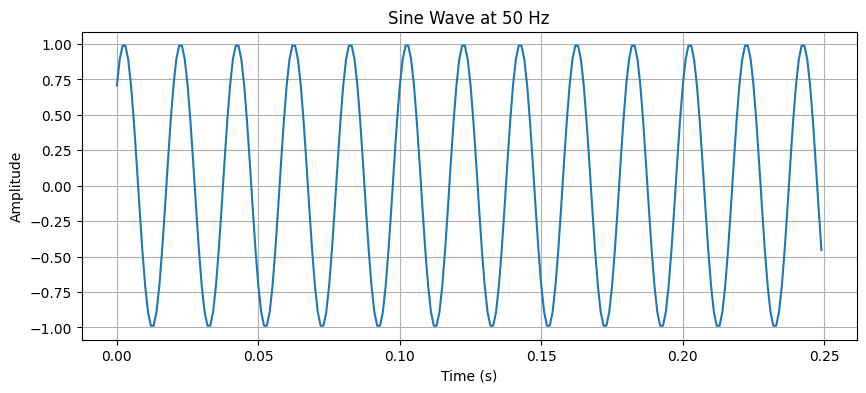

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sine_wave(A, f, phi, duration=1, sampling_rate=1000):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    y = A * np.sin(2 * np.pi * f * t + phi)
    
    plt.figure(figsize=(10, 4))
    plt.plot(t, y)
    plt.title(f'Sine Wave at {f} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

A = 1  # Amplitude
f = 50  # Frequency (Hz)
phi = np.pi/4  # Phase (radians)
duration = 0.25  # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz

plot_sine_wave(A, f, phi, duration, sampling_rate)


As the sine wave oscillates, it demonstrates a characteristic pattern of periodic oscillation, with the specified frequency determining the rate at which the waveform repeats over time. The phase offset introduces a horizontal shift in the waveform, altering its alignment within the time domain.

Stepehn Wolfram - Can AI Solve Science? [link](https://writings.stephenwolfram.com/2024/03/can-ai-solve-science/#:~:text=But%20despite%20all%20our%20efforts,help%20the%20progress%20of%20science.)


## Key Concepts in Sampling

- Sampling a Continous Function: Digital systems can only handle discrete data. The process of turning a continuous function into a discrete one is called sampling. Sampling involves measuring the value of a continuous signal at regular intervals to create a discrete set of data points that approximate the original continuous function.

- Sampling Rate (Frequency): The number of samples taken per second, usually measured in Hertz (Hz). A higher sampling rate provides a more accurate representation of the continuous signal.

- Nyquist Theorem: To accurately capture a continuous signal without aliasing (distortion), the sampling rate should be at least twice the highest frequency present in the signal. This minimum rate is known as the Nyquist rate.

- Quantization: After sampling, the continuous amplitude values are often quantized into discrete levels, which is a process typically seen in digital signal processing. This step is necessary for converting the sampled signal into a digital format.

## Cultural Pitch Perspectives
Pitch, as perceived by us humans, follows a logarithmic scale rather than a linear one. This means that the perceived difference in pitch between two musical tones is not directly proportional to the difference in their frequencies. Instead, the perceived pitch difference between two tones increases as the frequency increases.

In music theory, the equal temperament tuning system is commonly used, where the frequency ratio between adjacent notes in the chromatic scale is constant. This results in a logarithmic relationship between musical pitches. In Western music theory, an octave is divided into 12 equal intervals called semitones. For example, moving up an octave doubles the frequency of a note, while moving down an octave halves it. Similarly, each semitone step within an octave corresponds to a frequency ratio of $2^{1/12}$ times the previous frequency.

This logarithmic nature of pitch perception is essential for understanding the organization of musical scales, intervals, and harmonies in music. It also plays a crucial role in the design of musical instruments, audio processing algorithms, and various aspects of auditory perception research.

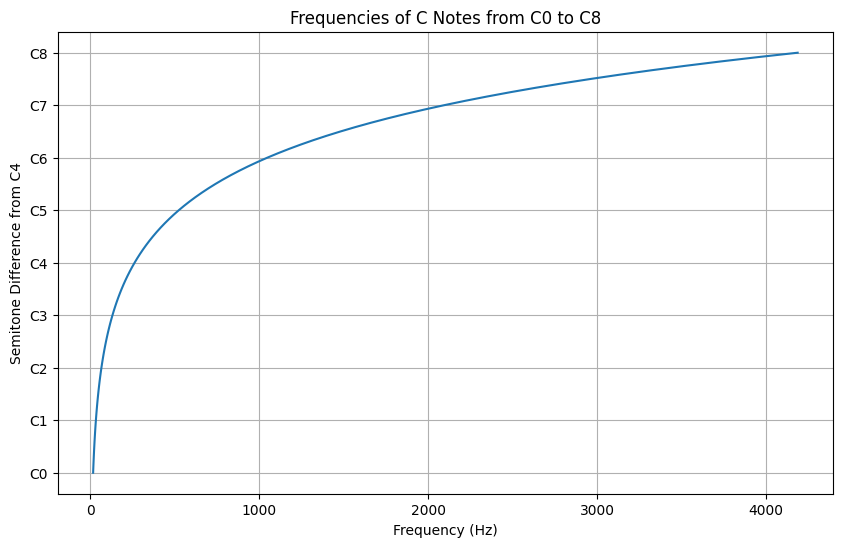

In [74]:
def calculate_frequency(C4_freq, semitone_diff):
    return C4_freq * (2 ** (semitone_diff / 12))

def plot_C_notes():
    C4_freq = 261.63  # Frequency of C4 note

    # To cover the semitone differences from C0 (which is 48 semitones below C4) to C8 (which is 48 semitones above C4)
    semitone_diff = np.arange(-48, 49)

    C_notes = calculate_frequency(C4_freq, semitone_diff)

    plt.figure(figsize=(10, 6))
    plt.plot(C_notes, semitone_diff, linestyle='-')
    plt.title('Frequencies of C Notes from C0 to C8')
    plt.ylabel('Semitone Difference from C4')
    plt.xlabel('Frequency (Hz)')
    plt.yticks(np.arange(-48, 49, 12), [f'C{i}' for i in range(9)])
    plt.grid(True)
    plt.show()

plot_C_notes()


By observing the plotted frequencies of C notes across various octaves, we can see this logarithmic pattern in action. This logarithmic nature of pitch perception is fundamental for understanding the organization of musical scales, intervals, and harmonies in music, as well as influencing the design of musical instruments and audio processing algorithms.

The semitone difference represents the distance in pitch between two consecutive musical notes. In Western music theory, an octave is divided into 12 equal intervals called semitones. Each semitone difference corresponds to moving one step up or down in the chromatic scale, which includes all the notes represented by the white and black keys on a piano keyboard.

In the provided code, we're using the semitone difference to generate a range of frequencies for C notes spanning multiple octaves. By starting from a reference note (C4 in this case) and calculating the frequency for C notes with semitone differences ranging from -48 to 49, we cover a wide range of octaves, from C0 to C8.


## Non-Western Music
- Indian Classical Music:

In Indian classical music, the octave is divided into 22 microtonal intervals known as shrutis. These intervals are not evenly spaced like semitones in Western music but are based on the concept of just intonation, which aims to achieve harmonic purity and resonance. Each shruti represents a specific frequency ratio relative to the tonic (sa), allowing for precise control over pitch and tuning in melodic improvisation and composition.

- Arabic Music:

Arabic music utilizes quarter tones, which are intervals half the size of a Western semitone. These intervals are crucial in maqamat, where melodic phrases are built around specific sequences of quarter tones and whole tones. Quarter tones allow for a finer level of pitch differentiation and flexibility in melodic ornamentation, enabling musicians to convey the subtle nuances and emotional nuances of the music.

- Chinese Music:

Traditional Chinese music often employs pentatonic scales, which consist of five notes per octave. Unlike the evenly spaced semitones in Western music, the intervals between notes in the pentatonic scale may vary, resulting in a unique tonal palette and melodic character. While the precise mathematical relationships between these intervals may differ from Western semitones, they contribute to the distinctive sound and aesthetic of Chinese music.

- African Music:

In African music, the concept of semitones may be less prevalent, particularly in traditional and folkloric styles where rhythmic complexity and polyphonic textures are emphasized. Instead, African music often features modal scales and pentatonic patterns that reflect the melodic and harmonic traditions of specific cultures and regions. While the intervals between notes may not conform to Western semitones, they contribute to the rich and diverse musical tapestry of African music.

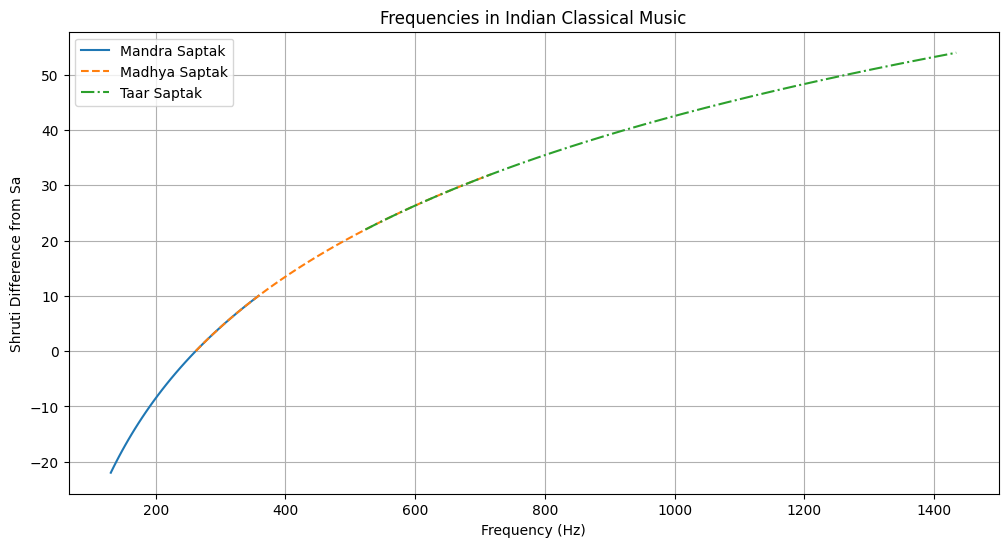

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_frequency(tuning_freq, shruti_diff):
    return tuning_freq * (2 ** (shruti_diff / 22))

def plot_indian_notes():
    tuning_freq = 261.63  # Frequency of Sa (equivalent to C4 in Western music)
    
    # Define the range of shrutis for each octave segment
    mandra_saptak_shrutis = np.arange(-22, 11)  # Mandra Saptak
    madhya_saptak_shrutis = np.arange(0, 33)    # Madhya Saptak
    taar_saptak_shrutis = np.arange(22, 55)     # Taar Saptak
    
    # Calculate frequencies for each octave segment
    mandra_saptak_notes = calculate_frequency(tuning_freq, mandra_saptak_shrutis)
    madhya_saptak_notes = calculate_frequency(tuning_freq, madhya_saptak_shrutis)
    taar_saptak_notes = calculate_frequency(tuning_freq, taar_saptak_shrutis)
    
    # Plot frequencies for each octave segment
    plt.figure(figsize=(12, 6))
    plt.plot(mandra_saptak_notes, mandra_saptak_shrutis, label='Mandra Saptak', linestyle='-')
    plt.plot(madhya_saptak_notes, madhya_saptak_shrutis, label='Madhya Saptak', linestyle='--')
    plt.plot(taar_saptak_notes, taar_saptak_shrutis, label='Taar Saptak', linestyle='-.')
    
    plt.title('Frequencies in Indian Classical Music')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Shruti Difference from Sa')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_indian_notes()


The note Sa (equivalent to the Western note C) serves as the reference pitch, and the octave range extends upwards and downwards from this note.

In Indian classical music, the concept of octaves and note names differs from Western music. Indian classical music primarily uses the Sargam system, which consists of seven notes: Sa, Re, Ga, Ma, Pa, Dha, and Ni. These notes correspond to the Western solfege syllables: Do, Re, Mi, Fa, Sol, La, and Ti, respectively.

The octave range in Indian classical music is typically referred to as Saptak, and it is divided into three segments:

1. Mandra Saptak: The lower octave segment.
2. Madhya Saptak: The middle octave segment.
3. Taar Saptak: The higher octave segment.

In Indian classical music, the tuning system is based on microtonal intervals called shrutis. Unlike Western music, where the octave is divided into 12 equal semitones, Indian music recognizes a greater number of intervals within the octave, typically 22 shrutis.

## Intensity, Loudmess & Timbre

### Understanding Intensity Levels
- **Logarithmic Scale**: Intensity levels are represented on a logarithmic scale rather than a linear one, further reflecting the nonlinear perception of loudness by the human ear.

- **Measured in Decibels (dB)**: Intensity levels are quantified using the unit decibels (dB), which provides a standardized measure of sound intensity.

- **Ratio Between Two Intensity Values**: Intensity levels are often expressed as the ratio between two intensity values, allowing for comparisons and quantification of changes in sound amplitude.

- **Use of Intensity References (Threshold of Hearing, TOH)**: Intensity levels are often referenced against standard thresholds, such as the Threshold of Hearing (TOH), which represents the minimum sound intensity detectable by the human ear.

#### $dB(I) = 10 \cdot \log_{10}(\frac{I}{I_{TOH}}) $

- $dB(I)$: Sound intensity level in decibels.
- $I$: Intensity of the sound being measured.
- $I_{TOH}$: Reference intensity level, Threshold of Hearing, representing the minimum sound intensity that can be perceived by the human ear.
- $log_{10}$: Logarithm base 10 function, used to calculate the logarithm of the intensity ratio.
- $\frac{I}{I_{TOH}}$: The ratio of the intensity of the sound being measured ($I$) to the reference intensity level ($I_{TOH}$).

Intensity is measured as watts over m<sup>2</sup>.


| Source | Intensity | Intensity level | x TOH |
| ------ | --------- | --------------- | ----- |
| Threshold of hearing (TOH) | 10<sup>-12</sup> | 0 dB | 1 |
| Whisper | 10<sup>-10</sup> | 20 dB | 10<sup>2</sup> |
| Pianissimo | 10<sup>-8</sup> | 40 dB | 10<sup>4</sup> |
| Normal conversation | 10<sup>-6</sup> | 60 dB | 10<sup>6</sup> |
| Fortissimo | 10<sup>-2</sup> | 100 dB | 10<sup>10</sup> |
| Threshold of pain | 10 | 130 dB | 10<sup>13</sup> |
| Jet take-off | 10<sup>2</sup> | 140 dB | 10<sup>14</sup> |
| Instant perforation of eardrum | 10<sup>4</sup> | 160 dB | 10<sup>16</sup> |

Müller, Fundamentals of Music Processing, Springer 2015

### Loudness
Loudness pertains to the subjective perception of sound intensity, reflecting how "loud" or "soft" a sound is perceived by an individual. This perception can vary significantly between individuals and is influenced by various factors, including the duration and frequency characteristics of the sound. Additionally, factors such as age can also affect how loudness is perceived, with younger individuals often perceiving sounds differently than older individuals. Loudness is commonly measured in units called phons, which provide a standardized measure of perceived loudness across different frequencies and sound levels.

### Timbre
Timbre is a complex aspect of sound that lacks a precise and comprehensive definition but is often described as the "color" of sound. It refers to the quality or character of a sound that distinguishes it from other sounds with the same intensity, frequency, and duration. Unlike pitch and loudness, which can be objectively measured and quantified, timbre is subjective and difficult to quantify precisely. Instead, it is often described using qualitative and fuzzy terms such as bright, dark, dull, harsh, or warm, which convey the unique tonal characteristics of a sound. These descriptors help capture the nuanced and subjective nature of timbre, allowing individuals to communicate and perceive the subtle differences between sounds.

Timbre is a multidimensional attribute of sound, influenced by various factors that contribute to its overall perceptual quality. One key feature is the sound envelope, which describes the temporal evolution of the sound from its onset to its decay. The envelope includes components such as attack, sustain, decay, and release, which affect the timbral qualities of the sound.

Another important aspect of timbre is the harmonic content, which refers to the specific frequency components present in the sound. Different instruments and sound sources produce unique harmonic spectra, leading to distinct timbral signatures. Additionally, amplitude and frequency modulation can contribute to the timbral richness of a sound, introducing dynamic variations and spectral changes that influence its perceived character.

## Sound Envelope

The concept of the sound envelope provides a structured framework for understanding the temporal evolution of a sound over time. One commonly used model to describe the sound envelope is the Attack-Decay-Sustain-Release (ADSR) model, which delineates four distinct phases in the life cycle of a sound.

The attack phase represents the initial build-up of sound energy immediately following the onset of the sound. This phase is characterized by a rapid increase in amplitude, leading to the peak intensity of the sound. The duration and intensity of the attack phase can vary widely depending on the characteristics of the sound source and the instrument being played.

Following the attack phase, the sound enters the decay phase, during which the amplitude gradually decreases from its peak level to a lower sustained level. The decay phase reflects the natural decrease in sound intensity over time, as the initial burst of energy dissipates.

After the decay phase, the sound enters the sustain phase, where the amplitude remains relatively constant at a sustained level. This phase represents the stable portion of the sound, characterized by a steady-state intensity that persists as long as the sound is sustained or sustained.

Finally, the release phase occurs when the sound concludes, leading to a gradual decrease in amplitude until the sound becomes inaudible. The duration and intensity of the release phase determine how quickly the sound fades away, ultimately shaping the overall perceptual quality of the sound envelope.

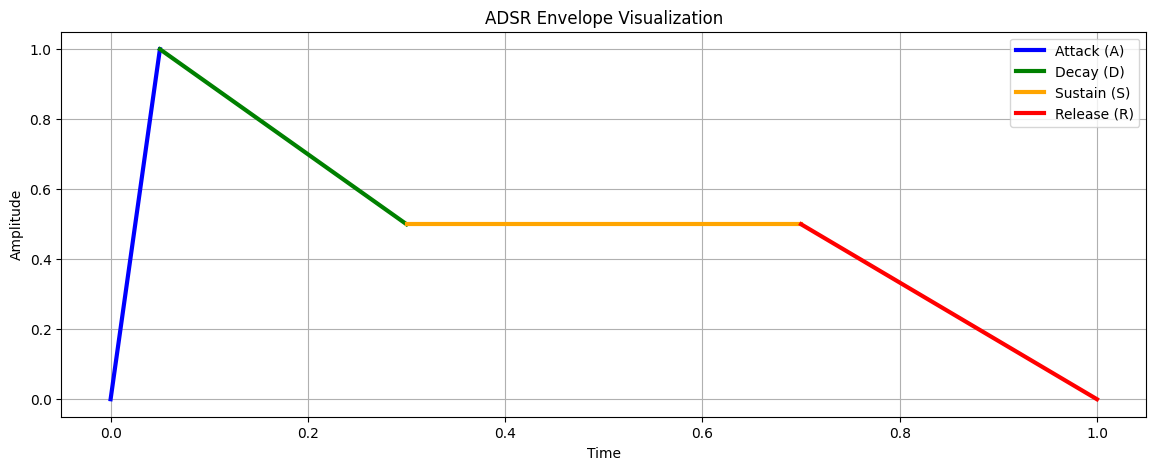

In [76]:
def plot_adsr(a, d, s, r):
    attack_time = np.linspace(0, a[0], 100)
    decay_time = np.linspace(0, d[0], 100)
    sustain_time = np.linspace(0, s[0], 100)
    release_time = np.linspace(0, r[0], 100)

    attack_amplitude = np.linspace(0, a[1], 100)
    decay_amplitude = np.linspace(a[1], d[1], 100)
    sustain_amplitude = np.ones(100) * s[1]
    release_amplitude = np.linspace(s[1], r[1], 100)

    plt.figure(figsize=(14, 5))
    plt.plot(attack_time, attack_amplitude, label='Attack (A)', color='blue', linewidth=3)
    plt.plot(decay_time + a[0], decay_amplitude, label='Decay (D)', color='green', linewidth=3)
    plt.plot(sustain_time + a[0] + d[0], sustain_amplitude, label='Sustain (S)', color='orange', linewidth=3)
    plt.plot(release_time + a[0] + d[0] + s[0], release_amplitude, label='Release (R)', color='red', linewidth=3)
    plt.title('ADSR Envelope Visualization')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    plt.show()

a,d,s,r = [0.05, 1.0], [0.25, 0.5], [0.4, 0.5], [0.3, 0.0]  # Duration and amplitude

plot_adsr(a, d, s, r)

The plot illustrates an aperiodic waveform during its distinct cycle. Beginning with an abrupt surge, the waveform swiftly ascends during the attack phase, signifying the initial transient as the sound is initiated. Following the attack, the waveform gradually descends during the decay phase, representing the reduction in intensity as the sound stabilizes. Sustained at a consistent amplitude, the waveform enters the sustain phase, reflecting a stable state where the sound persists. Finally, as the sound concludes, the waveform undergoes a gradual decline during the release phase, marking the attenuation of the sound until it fades into silence.

## Complex sounds

Most sounds aren't simple sine waves. Complex sounds arise from the superposition of multiple sinusoidal components. Each sinusoidal component, known as a partial, contributes to the overall sound profile. The lowest partial in a complex sound is referred to as the fundamental frequency, which serves as the primary pitch determinant. Harmonic partials are frequencies that are integer multiples of the fundamental frequency, giving rise to a harmonically rich timbre.

In contrast, inharmonicity describes a deviation from the harmonic partials typically associated with idealized vibrating systems. Inharmonic partials introduce a complex interplay of frequencies that can result in unique and characteristic timbral qualities.



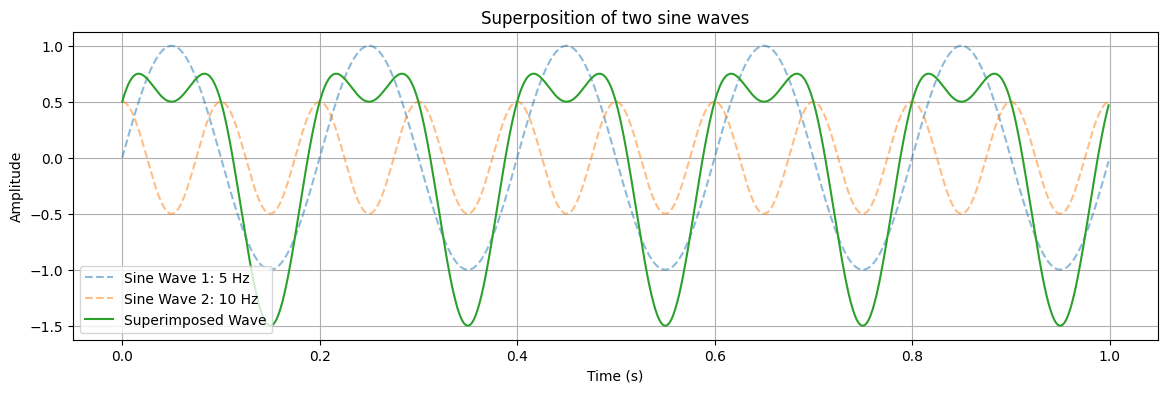

In [78]:
def plot_complex_wave(A1, f1, phi1, A2, f2, phi2, duration=1, sampling_rate=1000):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    y1 = A1 * np.sin(2 * np.pi * f1 * t + phi1)
    y2 = A2 * np.sin(2 * np.pi * f2 * t + phi2)
    y = y1 + y2
    
    plt.figure(figsize=(14, 4))
    plt.plot(t, y1, label=f'Sine Wave 1: {f1} Hz', linestyle='--', alpha=0.5)
    plt.plot(t, y2, label=f'Sine Wave 2: {f2} Hz', linestyle='--', alpha=0.5)
    plt.plot(t, y, label='Superimposed Wave')
    plt.title('Superposition of two sine waves')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_complex_wave(1, 5, 0, 0.5, 10, np.pi/2)

Simply superimposing two sine waves by adding them together in a process known as linear superposition. This results in a complex wave that is the sum of the two individual sine waves.

For comparison, here is an amplitude modulation (AM) and a frequency modulation (FM).

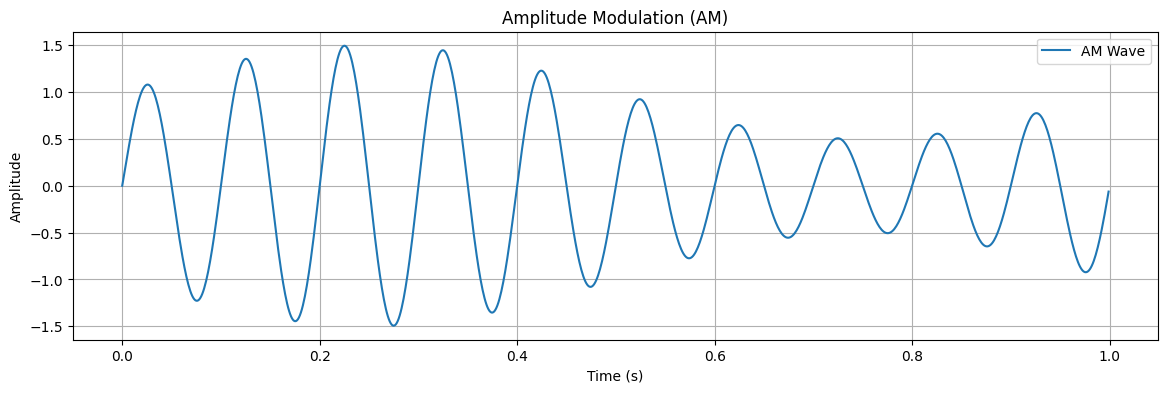

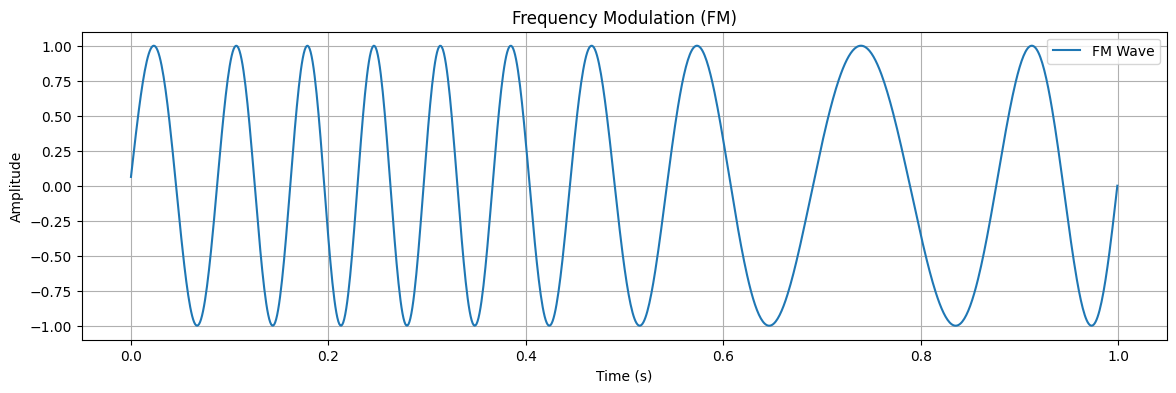

In [81]:
def plot_am_wave(A, fc, fm, m, duration=1, sampling_rate=1000):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    carrier = A * np.sin(2 * np.pi * fc * t)
    modulator = 1 + m * np.sin(2 * np.pi * fm * t)
    am_wave = carrier * modulator
    
    plt.figure(figsize=(14, 4))
    plt.plot(t, am_wave, label='AM Wave')
    plt.title('Amplitude Modulation (AM)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_fm_wave(A, fc, fm, df, duration=1, sampling_rate=1000):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    modulator = np.sin(2 * np.pi * fm * t)
    instantaneous_frequency = fc + df * modulator
    fm_wave = A * np.sin(2 * np.pi * np.cumsum(instantaneous_frequency) / sampling_rate)
    
    plt.figure(figsize=(14, 4))
    plt.plot(t, fm_wave, label='FM Wave')
    plt.title('Frequency Modulation (FM)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_am_wave(1, 10, 1, 0.5)
plot_fm_wave(1, 10, 1, 5)


- AM Wave: The amplitude of the carrier wave (frequency fc) is modulated by the modulating wave (frequency fm) with a modulation index m.
- FM Wave: The frequency of the carrier wave (frequency fc) is modulated by the modulating wave (frequency fm) with a frequency deviation df.

## Complex Numbers


##

### Fourier Transform

- Decompose a complex sound into its frequency components
- From time to frequency domain
- Compare signal with sinusoids of various frequencies

For each frequency we get a magnitude and a phase. High magnitude indicates high similarity between the signal and a sinusoid.

Calculating phase:

$\varphi_f = argmax_{\varphi\in[0,1)]}(\int s(t)\cdot \sin(2\pi \cdot(ft-\varphi ))\cdot dt)$

Calculate area with integral.

Select phase in [0,1) that maximise the area.

Calculate magnitude:

$d_f = \max_{\varphi\in[0,1)]}(\int s(t)\cdot \sin(2\pi \cdot(ft-\varphi ))\cdot dt)$

Sample a continuous function to get a discrete version of it.



---

# Audio Features

Features serve as the building blocks for many machine learning applications, ranging from music classification and genre recognition to speech recognition and environmental sound detection. 

## Level of Abstraction
- High level
    - Instrumentation, key, chord, melody, rythm, tempo, lyrics, genre, mood
    - Very abstract features, tend to map to musical constructs that we can understand and perceive

- Mid level
    - Pitch- and beat-related descriptors such as note onsets, fluctuation patterns, MFCCs
    - Makes somewhat sense from a perceptual perspective

- Low level
    - Amplitude envelope, energy, spectral centroid, spectral flux, zero-crossing rate 
    - Low level features makes sense for the machine, but not that much for us human beings (in terms of just describing music)


Knees, P. & Schedl, M. (2016) Music similarity and retrieval: an introduction to audio and web-based strategies

## Temporal scope
- Instanteneous (~50 ms)
    - Very short chunks of audio signal. Plays important role in stereo / sound localization
- Segmentet-level (seconds)
    - Calculate as segments. Features that give us information about a bar or a musical phrase. 
- Global
    - Aggregated from lower temporal features, use some kind of average that describes the whole sound, the whole signal.

At the instantaneous level, features are computed over very short chunks of audio, typically around 50 milliseconds in duration. These instantaneous features play a crucial role in stereo and sound localization tasks, providing insights into the spatial distribution of sound sources and aiding in the perception of auditory depth.

At the segment-level, features are calculated over longer segments of audio, typically spanning several seconds. These segment-level features offer information about larger structural elements of the audio, such as musical phrases or bars. By analyzing audio in segments, we can extract features that capture temporal patterns and dynamics, facilitating tasks such as music segmentation, chord recognition, and beat tracking.

At the global level, features are aggregated from lower temporal resolutions to describe the overall characteristics of the entire audio signal. These global features provide a holistic view of the audio, summarizing its temporal dynamics and spectral content in a condensed form. By computing averages or other aggregate statistics over time, global features offer insights into the overarching properties of the audio, enabling tasks such as audio classification, genre recognition, and mood analysis.

# Signal domain
- Time domain
    - Amplitude envelope, root-mean square energy, zero crossing rate, etc. 
        - Extracted from waveforms
        - Time domain in a waveform contains all events that happens in a sound
        - Problem: Sound is characterized by frequencies, the time domain representation doesn't contain frequencies

Time domain features include the amplitude envelope, root-mean-square (RMS) energy, zero-crossing rate, among others. The time domain representation provides insight into the temporal characteristics of the audio signal, capturing events such as amplitude fluctuations and transitions between positive and negative voltage levels.

To transition from the time domain to the frequency domain, we apply the Fourier transform to the raw audio signal. This transformation allows us to decompose the signal into its constituent frequency components, revealing the frequency content and magnitude of the audio. The resulting spectrum provides a comprehensive view of the distribution of energy across different frequency bands, offering valuable information for audio analysis and processing tasks.

Time domain and frequency domain complements each other.

- Frequency domain
    - Band energy ratio, spectral centroid, spectral flux, etc.
        - We take the raw audio from its time-domain representation, apply the fourier transform, and translate the signal from the time domain to the frequency domain, this gives us a spectrum. (Frequency and magnitude).

Time domain and frequency domain complements each other.

Time-frequency domain features that combine information from both the time and frequency domains. These features include the spectrogram, Mel-spectrogram, Constant-Q transform, among others. By employing techniques such as short-time Fourier transform (STFT) or wavelet transform, we can generate representations that capture both the temporal and spectral characteristics of the audio signal simultaneously. These time-frequency representations provide valuable insights into the time-varying spectral content of the audio, enabling more robust analysis and processing of complex audio signals.


# Feature Extraction

## Basic Feature Extraction

### Metadata
Not all file formats can save metadata. Depending on the output file format, all metadata or only part of the metadata is saved in an audio file. The following file formats can contain metadata:

- .wav
- .mp3
- .ogg
- .wma
- .flac
- .aac

For MP3, the following metadata types are available:

- ID3 v1 and ID3 v2, including picture support

AAC is used for MPEG-4 (iTunes compatible) and 3GPP containers.

For WAV, the following metadata types are available:

- RIFF
- BWF
- BWF markers
- CART (AES standard, dedicated to broadcast needs)
- ID3, including picture support